In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def replace_name(name: str):
    if name == "MCDLSTM":
        return "MCD-LSTM"
    if name == "MCD":
        return "MCD-LSTM"
    if name == "LSTMQ":
        return "LSTM-Q"
    if name == "LSTM":
        return "C-LSTM"
    return name

<h3>Plots scenario PERSISTENCE MODE=OFF</h3>

In [60]:
df_scenario_22_results = pd.read_csv("scenarios/scenario_22_results.csv")
df_scenario_22_results['model'] = df_scenario_22_results['model'].apply(replace_name)



df_success = pd.read_csv("success_table.csv")
df_success = df_success[df_success["model"] != "baseline_c"].copy()
df_success['model'] = df_success['model'].apply(replace_name)

# df_scenario_22_results = df_scenario_22_results[df_scenario_22_results["model"] != "MCD-LSTM"]
# df_success = df_success[df_success["model"] != "MCD-LSTM"]

In [61]:
models = ["HBNN", "HBNN++", "MCD-LSTM", "LSTM-Q", "C-LSTM", "PROPHET", "oracle"]

# models = ["HBNN", "HBNN++", "C-LSTM", "oracle", "LSTM-Q", "PROPHET"]

df_success['model'] = df_success['model'].str.replace('MCDLSTM','MCD')
all_qos = df_success["qos"].unique()
d = {"model": ["oracle" for i in range(len(all_qos))],
     "qos": all_qos,
     "SR": [1 for i in range(len(all_qos))],
     "UP": [0 for i in range(len(all_qos))],
     "OP": [0 for i in range(len(all_qos))]}
df_base_a = pd.DataFrame(data=d)
df_success = pd.concat([df_success, df_base_a], ignore_index=True, axis=0)
df_success.reset_index(inplace=True, drop=True)

In [62]:
scenarios_results = {}
for qos in df_scenario_22_results.qos.unique():
    df_scen = df_scenario_22_results[df_scenario_22_results["qos"] == qos].copy()
    max_cost = float(df_scen[df_scen["model"] == "naive"]["energy_cost"])
    df_scen["savings (%)"] = df_scen.apply(lambda row: 100 - row["energy_cost"]/max_cost*100, axis=1)
    scenarios_results[qos] = df_scen

In [63]:
qos_values = []
savings_values = []
model_values = []
succ_values = []
op_values = []
up_values = []
for qos in scenarios_results:
    df_scen = scenarios_results[qos]
    df_scen = df_scen[df_scen["model"].isin(models)].copy()
    df_scen.sort_values(by="model",axis=0, inplace=True)
    df_succ = df_success[df_success["qos"] == qos]
    df_succ.sort_values(by="model",axis=0, inplace=True)

    savings_values.extend(df_scen["savings (%)"].values)
    qos_values.extend(df_scen["qos"].values)
    model_values.extend(df_scen["model"].values)
    succ_values.extend(df_succ["SR"].values)
    op_values.extend(df_succ["OP"].values)
    up_values.extend(df_succ["UP"].values)
d = {"qos": qos_values,
     "model": model_values,
     "savings": savings_values,
     "SR": succ_values,
     "OP": op_values,
     "UP": up_values,
     }
df_plot = pd.DataFrame(data=d)

/home/diego/miniconda3/envs/workloadpred/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


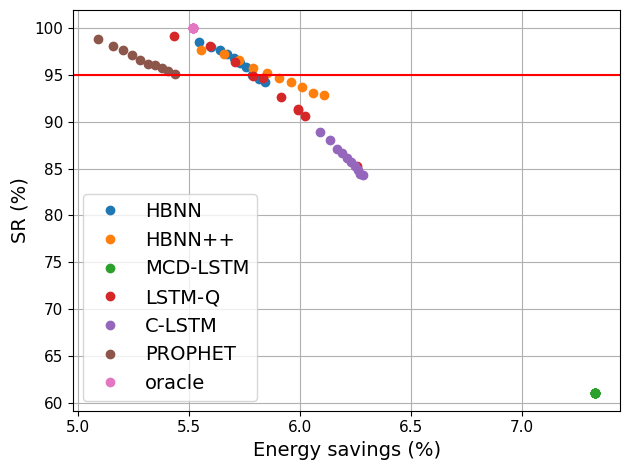

In [64]:
# build plot
%matplotlib inline
fig, ax = plt.subplots()
# ax.set_title("Savings vs SR of prediction (SCEN#22)")
for model in models:
    df_model = df_plot[df_plot["model"] == model].copy()
    df_model.sort_values(by="qos", ascending=True, inplace=True)
    qos_values = df_model.qos
    savings_values = df_model.savings
    succ_values = df_model.SR*100
    ax.plot(savings_values, succ_values, 'o', label=model)

# ax.legend()
plt.axhline(y =95, color = 'r', linestyle = '-')
ax.set_xlabel("Energy savings (%)", fontsize = 14)
ax.set_ylabel("SR (%)", fontsize = 14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()
ax.legend(loc=3, prop={'size': 14})
plt.tight_layout()
plt.savefig('scenarios/plots/scenario_22.png')
# plt.savefig('scenarios/plots/scenario_22.eps', format='eps')
plt.show()

<h3>Plots scenario PERSISTENCE MODE=ON</h3>

In [4]:
df_scenario_33_results = pd.read_csv("scenarios/scenario_33_results.csv")
df_scenario_33_results['model'] = df_scenario_33_results['model'].apply(replace_name)

df_success = pd.read_csv("success_table.csv")
df_success = df_success[df_success["model"] != "baseline_c"].copy()
df_success['model'] = df_success['model'].apply(replace_name)

In [5]:
models = ["HBNN", "HBNN++", "MCD-LSTM", "LSTM-Q", "C-LSTM", "PROPHET", "oracle"]

all_qos = df_success["qos"].unique()
d = {"model": ["oracle" for i in range(len(all_qos))],
     "qos": all_qos,
     "SR": [1 for i in range(len(all_qos))],
     "UP": [0 for i in range(len(all_qos))],
     "OP": [0 for i in range(len(all_qos))]}
df_base_a = pd.DataFrame(data=d)
df_success = pd.concat([df_success, df_base_a], ignore_index=True, axis=0)
df_success.reset_index(inplace=True, drop=True)

In [6]:
scenarios_results = {}
for qos in df_scenario_33_results.qos.unique():
    df_scen = df_scenario_33_results[df_scenario_33_results["qos"] == qos].copy()
    max_cost = float(df_scen[df_scen["model"] == "naive"]["energy_cost"])
    df_scen["savings (%)"] = df_scen.apply(lambda row: 100 - row["energy_cost"]/max_cost*100, axis=1)
    scenarios_results[qos] = df_scen

In [7]:
qos_values = []
savings_values = []
model_values = []
succ_values = []
op_values = []
up_values = []
for qos in scenarios_results:
    df_scen = scenarios_results[qos]
    df_scen = df_scen[df_scen["model"].isin(models)].copy()
    df_scen.sort_values(by="model",axis=0, inplace=True)
    df_succ = df_success[df_success["qos"] == qos]
    df_succ.sort_values(by="model",axis=0, inplace=True)

    savings_values.extend(df_scen["savings (%)"].values)
    qos_values.extend(df_scen["qos"].values)
    model_values.extend(df_scen["model"].values)
    succ_values.extend(df_succ["SR"].values)
    op_values.extend(df_succ["OP"].values)
    up_values.extend(df_succ["UP"].values)
d = {"qos": qos_values,
     "model": model_values,
     "savings": savings_values,
     "SR": succ_values,
     "OP": op_values,
     "UP": up_values,
     }
df_plot = pd.DataFrame(data=d)

/home/diego/miniconda3/envs/workloadpred/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


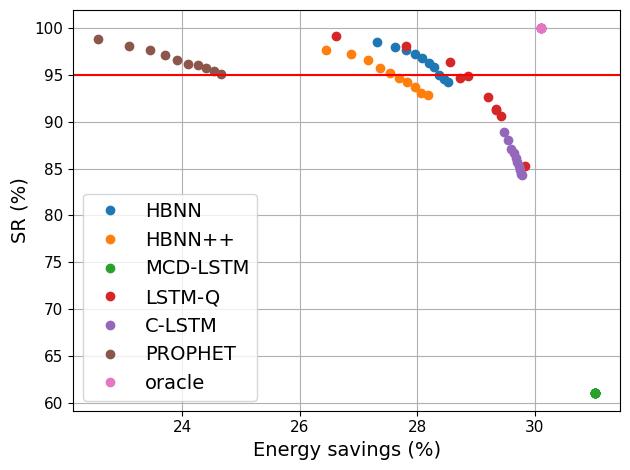

In [8]:
# build plot
%matplotlib inline
fig, ax = plt.subplots()
# ax.set_title("Savings vs SR of prediction (SCEN#33)")
ax.set_xlabel("Energy savings (%)")
ax.set_ylabel("SR of prediction")
for model in models:
    df_model = df_plot[df_plot["model"] == model].copy()
    df_model.sort_values(by="qos", ascending=True, inplace=True)
    qos_values = df_model.qos
    savings_values = df_model.savings
    succ_values = df_model.SR*100
    ax.plot(savings_values, succ_values, 'o', label=model)

# ax.legend()
plt.axhline(y =95, color = 'r', linestyle = '-')
ax.set_xlabel("Energy savings (%)", fontsize = 14)
ax.set_ylabel("SR (%)", fontsize = 14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid()

# handles, labels = plt.gca().get_legend_handles_labels()
# order = models
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

ax.legend(loc=3, prop={'size': 14})
plt.tight_layout()
plt.savefig('scenarios/plots/scenario_33.png')
# plt.savefig('scenarios/plots/scenario_33.eps', format='eps')
plt.show()